<a href="https://colab.research.google.com/github/parth-mango/EVA5-Assignments/blob/main/EVA%20S11/EVA_S11_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install wget

# !pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [ ]:
# from datetime import datetime
# print(datetime.now())

In [ ]:
!rm *.py.1
# !rm *.py.2
# !rm *.py


rm: cannot remove '*.py.1': No such file or directory


In [ ]:
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/album_transform.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/dataloaders.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA5%20S8/misc.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/model.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/cyclic_plot.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/reg_tech.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/testing.py
# !wget https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/training.py

--2021-02-27 22:45:53--  https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/album_transform.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482 [text/plain]
Saving to: ‘album_transform.py.1’

album_transform.py. 100%[===================>]     482  --.-KB/s    in 0s      

2021-02-27 22:45:53 (39.2 MB/s) - ‘album_transform.py.1’ saved [482/482]

--2021-02-27 22:45:53--  https://raw.githubusercontent.com/parth-mango/EVA5-Assignments/main/EVA%20S11/dataloaders.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# from QuizDNN import Net
import training
import reg_tech
import testing
import dataloaders
import album_transform 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")






classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
dropout_value= 0.05

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1) 
        self.batch1= nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.batch2= nn.BatchNorm2d(128) 
        self.conv_res1 = nn.Conv2d(128, 128, 3, padding=1)
        self.batch_res1= nn.BatchNorm2d(128) 
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.batch3= nn.BatchNorm2d(256) 
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.batch4= nn.BatchNorm2d(512) 
        self.conv_res2 = nn.Conv2d(512, 512, 3, padding=1)
        self.batch_res2= nn.BatchNorm2d(512) 
        self.pool2 = nn.MaxPool2d(stride= 2, kernel_size= 4)
        self.flat= nn.Flatten()
        self.drop= nn.Dropout(dropout_value)
        self.dense= nn.Linear(2048, 10)




    def forward(self, x):
      x= self.drop(F.relu(self.batch1(self.conv1(x))))
      x= self.drop(F.relu(self.batch2(self.pool1(self.conv2(x)))))
      res_x1= F.relu(self.batch_res1(self.conv_res1(x)))
      res_x1= F.relu(self.batch_res1(self.conv_res1(res_x1)))
      f_x1=  torch.add(x, res_x1) # Can also be directly added 
      f_x1=self.drop( F.relu(self.batch3(self.pool1(self.conv3(f_x1)))))
      f_x1= self.drop(F.relu(self.batch4(self.conv4(f_x1))))
      res_x2= F.relu(self.batch_res2(self.conv_res2(f_x1)))
      res_x2= F.relu(self.batch_res2(self.conv_res2(res_x2)))
      f_x2=  torch.add(f_x1, res_x2)
      f_x2= self.pool2(f_x2)
      f_x2= self.drop(self.flat(f_x2))
      f_x2= self.dense(f_x2)
      f_x2 = f_x2.view(-1, 10)
      return F.log_softmax(f_x2) 
      # return f_x2
      






      

In [ ]:
from torchsummary import summary

net = Net()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
           Dropout-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
           Dropout-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
           Conv2d-12          [-1, 256, 14, 14]         295,168
        MaxPool2d-13            [-1, 256, 7, 7]               0
      BatchNorm2d-14            [-1, 25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
train_losses = []
test_losses = []

In [ ]:
from album_transform import train_transform, test_transform

batch_size = 512
train_loader, test_loader, sample_loader = dataloaders.data_loaders(batch_size, train_transform, test_transform)

    
# def hi_optimizer(model):
#     optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#     return optimizer
optimizer= reg_tech.hi_optimizer(model, 0.001)

# print(len(train_loader))
# optimizer= hi_optimizer(model)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


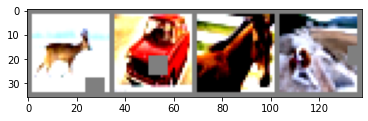

In [ ]:
import misc

misc.show_images(sample_loader, classes)

In [ ]:
# !pip install torch-lr-finder


In [ ]:
from torch_lr_finder import LRFinder


model = net.to(device)
optimizer_testing = reg_tech.hi_optimizer(model, 0.0005)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer_testing, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=0.1, num_iter=2500, step_mode="exp", diverge_th=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Learning rate search finished. See the graph with {finder_name}.plot()


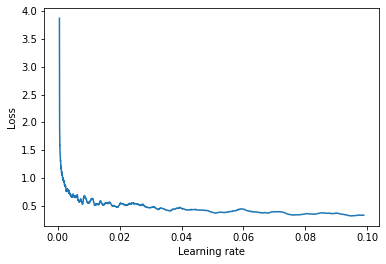

In [ ]:
lr_finder.plot(suggest_lr=False, log_lr=False)

In [ ]:

scheduler = optim.lr_scheduler.OneCycleLR(optimizer, 
max_lr= 0.01, epochs=25, steps_per_epoch= 100 ,pct_start= 0.22 )
for epoch in range(1, 26):
    
    training.train(model, device, train_loader, optimizer, epoch, scheduler)
    
    testing.test(model, device, test_loader)
    
    
    
    print('Epoch-{0} lr: {1}'.format(epoch,optimizer.param_groups[0]['lr']))

  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=1.3937633037567139 Batch_id=97 Accuracy=32.89: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 4920/10000 (49.20%)

Epoch-1 lr: 0.0011352020150605328


Loss=1.5008649826049805 Batch_id=97 Accuracy=51.73: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5602/10000 (56.02%)

Epoch-2 lr: 0.0031155905590133518


Loss=1.0410172939300537 Batch_id=97 Accuracy=60.21: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5962/10000 (59.62%)

Epoch-3 lr: 0.005734504945143082


Loss=0.8152998089790344 Batch_id=97 Accuracy=67.84: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7172/10000 (71.72%)

Epoch-4 lr: 0.008189682200969056


Loss=0.826616108417511 Batch_id=97 Accuracy=73.45: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7246/10000 (72.46%)

Epoch-5 lr: 0.009729017632402089


Loss=0.5908604860305786 Batch_id=97 Accuracy=77.48: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 7118/10000 (71.18%)

Epoch-6 lr: 0.00999013368160679


Loss=0.6466454863548279 Batch_id=97 Accuracy=79.81: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8130/10000 (81.30%)

Epoch-7 lr: 0.009878704100019049


Loss=0.4859103262424469 Batch_id=97 Accuracy=83.39: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7572/10000 (75.72%)

Epoch-8 lr: 0.009645912435938387


Loss=0.4711410403251648 Batch_id=97 Accuracy=84.66: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7820/10000 (78.20%)

Epoch-9 lr: 0.009297549611785819


Loss=0.39485612511634827 Batch_id=97 Accuracy=86.44: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8173/10000 (81.73%)

Epoch-10 lr: 0.008842281496663645


Loss=0.4108116924762726 Batch_id=97 Accuracy=87.01: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8289/10000 (82.89%)

Epoch-11 lr: 0.008291433334307907


Loss=0.40014517307281494 Batch_id=97 Accuracy=89.15: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8323/10000 (83.23%)

Epoch-12 lr: 0.007658708016471861


Loss=0.27438053488731384 Batch_id=97 Accuracy=90.29: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8444/10000 (84.44%)

Epoch-13 lr: 0.006959845209968178


Loss=0.266958087682724 Batch_id=97 Accuracy=91.04: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8443/10000 (84.43%)

Epoch-14 lr: 0.0062122298169211415


Loss=0.20446200668811798 Batch_id=97 Accuracy=92.13: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8570/10000 (85.70%)

Epoch-15 lr: 0.00543445950816654


Loss=0.20692791044712067 Batch_id=97 Accuracy=93.30: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8502/10000 (85.02%)

Epoch-16 lr: 0.004645882087832798


Loss=0.21196681261062622 Batch_id=97 Accuracy=94.18: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8569/10000 (85.69%)

Epoch-17 lr: 0.0038661141976160255


Loss=0.16378070414066315 Batch_id=97 Accuracy=95.10: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8589/10000 (85.89%)

Epoch-18 lr: 0.003114553333455232


Loss=0.13917207717895508 Batch_id=97 Accuracy=95.84: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8696/10000 (86.96%)

Epoch-19 lr: 0.0024098953136745373


Loss=0.0738271102309227 Batch_id=97 Accuracy=96.24: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8730/10000 (87.30%)

Epoch-20 lr: 0.0017696692020486553


Loss=0.07824673503637314 Batch_id=97 Accuracy=97.05: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8727/10000 (87.27%)

Epoch-21 lr: 0.0012098012550394383


Loss=0.07201376557350159 Batch_id=97 Accuracy=97.52: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8810/10000 (88.10%)

Epoch-22 lr: 0.000744218740446377


Loss=0.0921240746974945 Batch_id=97 Accuracy=97.87: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8791/10000 (87.91%)

Epoch-23 lr: 0.0003845034828731732


Loss=0.07283607125282288 Batch_id=97 Accuracy=98.11: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8776/10000 (87.76%)

Epoch-24 lr: 0.00013960375440889213


Loss=0.05605147406458855 Batch_id=97 Accuracy=98.24: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.0008, Accuracy: 8807/10000 (88.07%)

Epoch-25 lr: 1.5611677527350335e-05


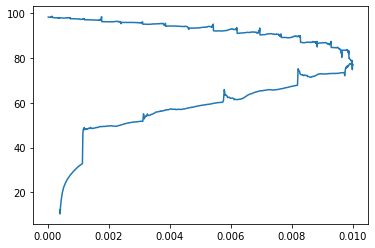

In [ ]:
# min_lr= 0.001125 , max_lr= 0.009
import matplotlib.pyplot as plt
plt.plot(training.lr_list, training.train_acc)


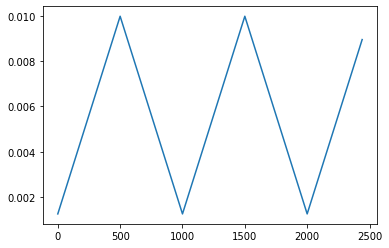

In [ ]:
# Plot a graph between LR and iterations

import cyclic_plot

cyclic_plot.triangular_plot(iterations= 2442, stepsize= 500, lr_max= 0.0099901336 , lr_min= 0.00124876)